# EDA of Sentences Given without `ENSPLT0`
___

## Imports

In [1]:
# !pip install scikit-optimize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from skopt import BayesSearchCV

## Custom Functions

In [3]:
#Return visualizations for each fold

data = pd.read_csv('../data/eda_booker_report.csv', index_col='Unnamed: 0')

def eda(model, target):
    model_info = f"""Model info
    Best Estimator: {model.best_estimator_}
    N Splits: {model.n_splits_}
    N Features In: {model.n_features_in_}
    Best Score: {model.best_score_}
    """
    print(model_info)
    
    X_data = data.drop(columns=[target, 'ENSPLT0'])
    columns = list(X_data.columns)
    # print(columns)

    for idx in range(len(columns)):
        # print(f'{columns[idx]}\n')
        plt.plot(pd.DataFrame(model.best_estimator_.coef_)[idx])
        plt.title(f"Coefficients for {columns[idx]} for each class")
        plt.show()

In [4]:
# sort coef values for each split
def eda_confusion(model, target, drop_val):
    # Coefficients
    df_model = pd.DataFrame(model.best_estimator_.coef_, columns = [data.drop(columns=[target, drop_val]).columns]).T
    
    for target_class in range(5):
        print(f'Top 10 Coefficients for Target {target_class}')
        print(f'for every one unit increase, the chance for it being target {target_class} increases by the coefficient.')
        print(np.exp(df_model[target_class].sort_values(ascending=False)).head(10))
        print('\n')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, model.predict(X_test_sc));
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(baseline[0]))
    plt.xticks(rotation = 45)
    disp.plot()
    return plt.show()

## Analyzing Models

### Baseline Model

In [5]:
target_classes = pd.DataFrame([
    {0: "No Prison/Probation (Fine Only)",
    1: "Prison Only (No Alternatives)",
    2: "Prison + Confinement Conditions (Alternatives, Including Zone C Split Sentences)",
    3: "Probation + ConfinementConditions (Alternatives)",
    4: "Probation Only"}]).T

In [6]:
counts = pd.DataFrame(data['SENTIMP'].value_counts(normalize = True))
baseline = target_classes.merge(counts, left_index=True, right_index=True)
baseline

,0,SENTIMP
0,No Prison/Probation (Fine Only),0.001714
1,Prison Only (No Alternatives),0.841974
2,"Prison + Confinement Conditions (Alternatives,...",0.034800
3,Probation + ConfinementConditions (Alternatives),0.047160
4,Probation Only,0.074353


### BayesSearchCV

In [7]:
with open('../models/sentimp/sentimp2_bs_lg', 'rb') as p_in_bs:
    bs_logreg = pickle.load(p_in_bs)

/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model info
    Best Estimator: LogisticRegression(C=2222.996482526191, max_iter=13352, random_state=42)
    N Splits: 5
    N Features In: 26
    Best Score: 0.8721464285714285
    


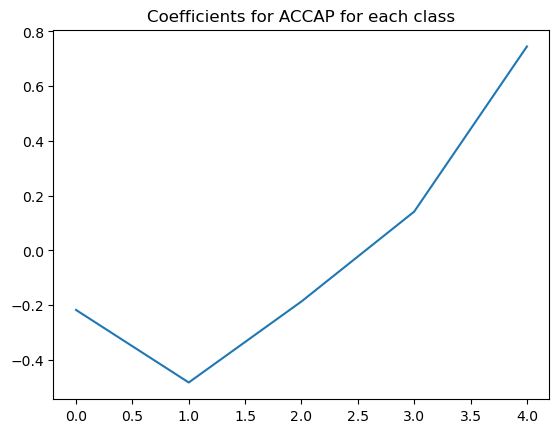

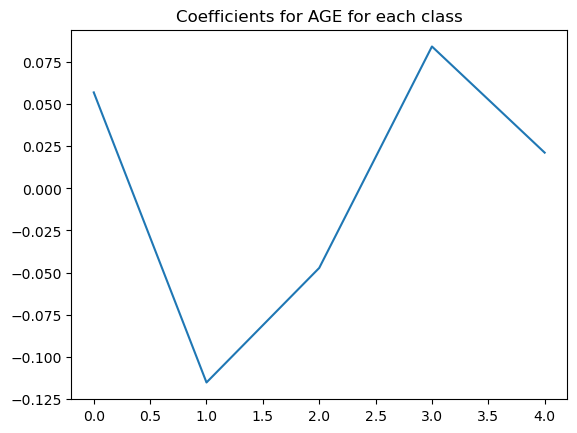

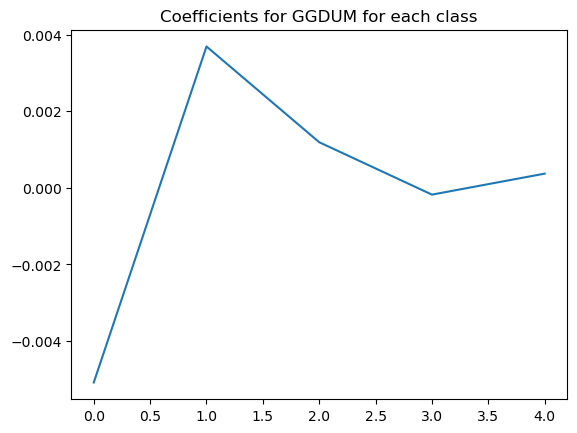

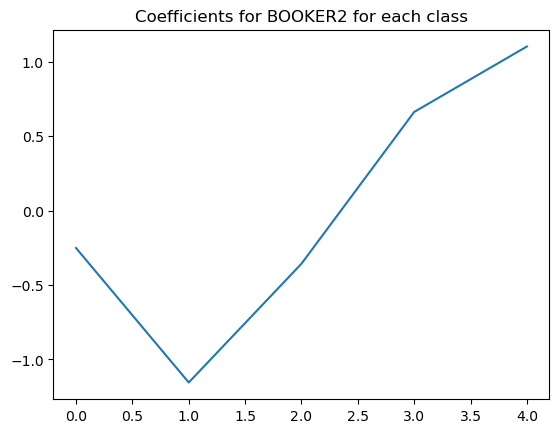

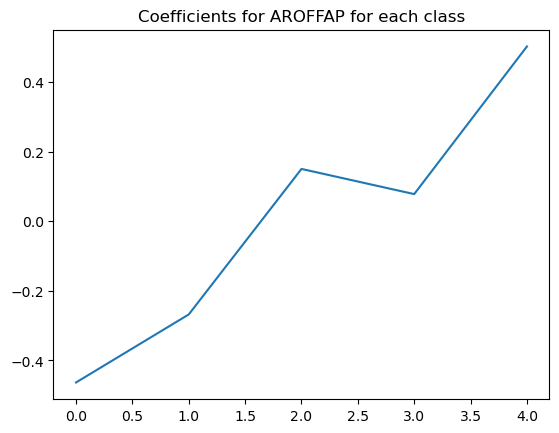

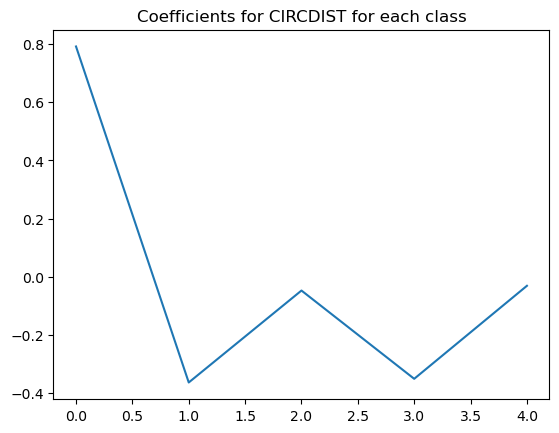

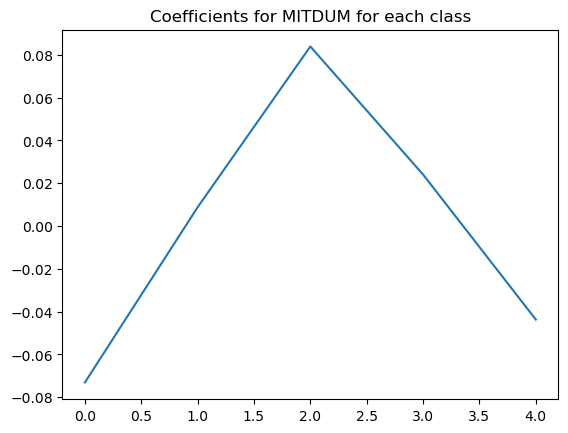

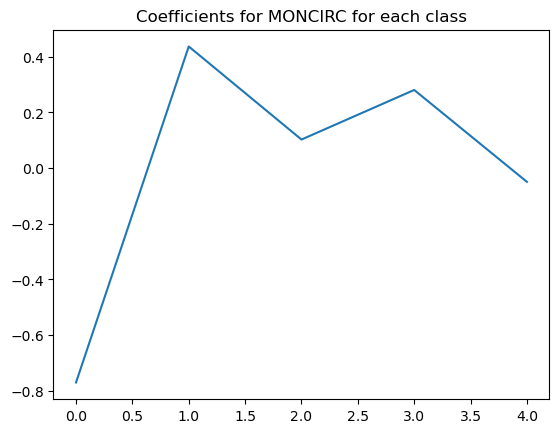

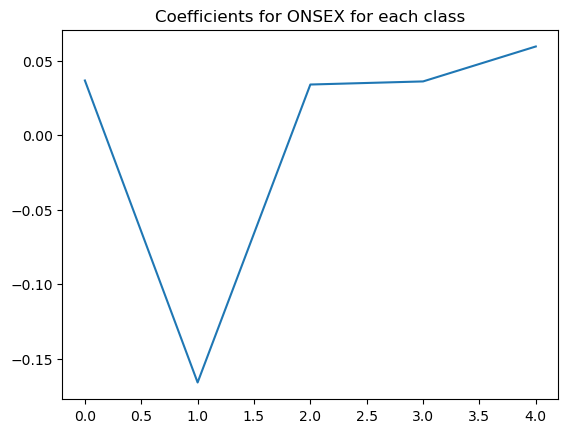

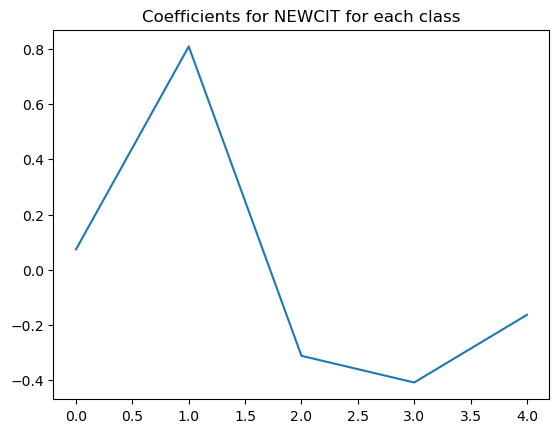

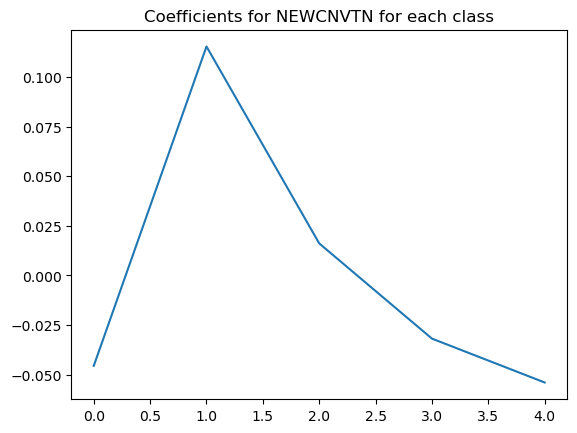

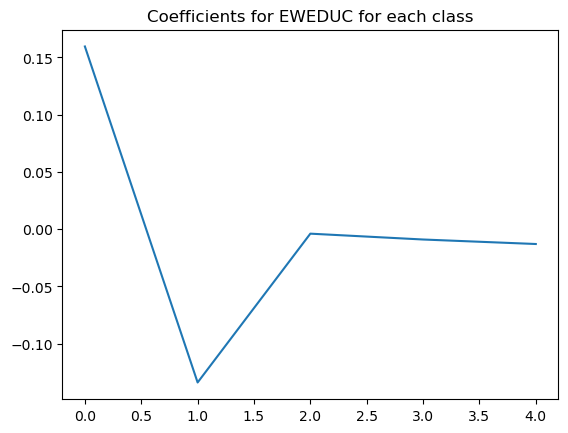

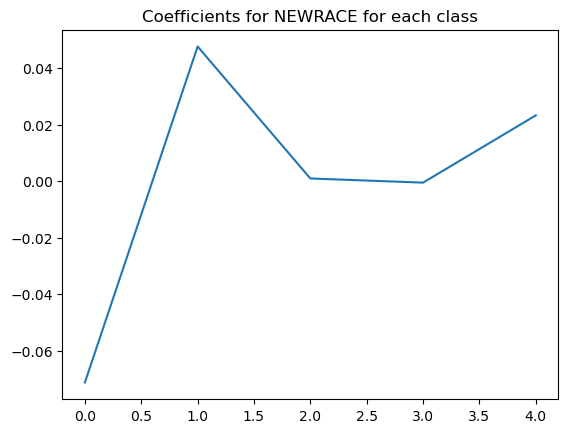

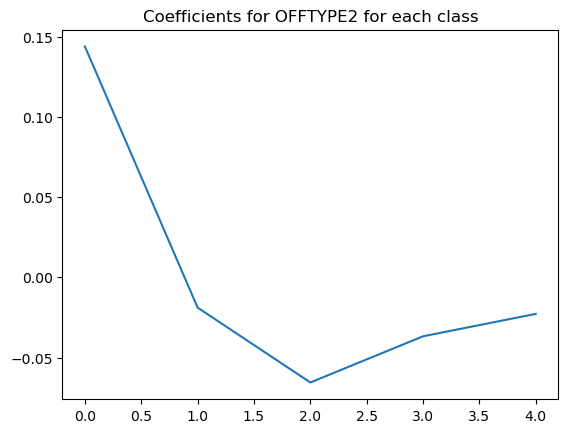

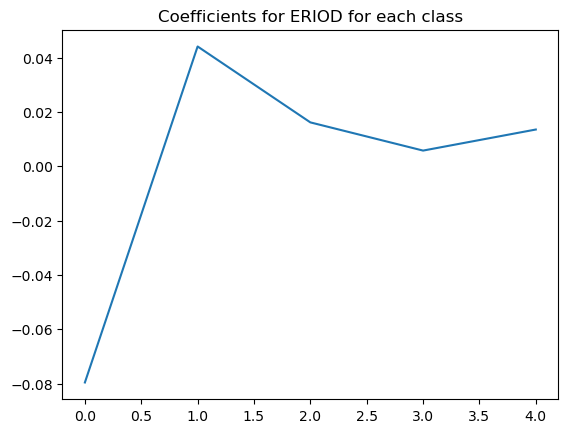

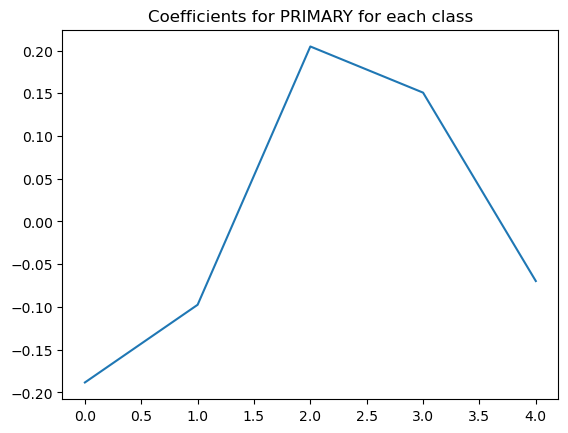

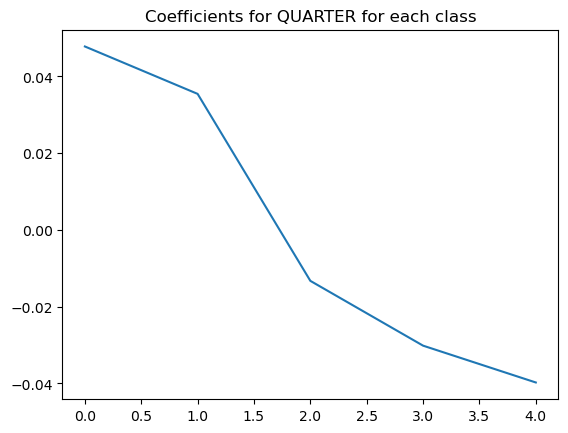

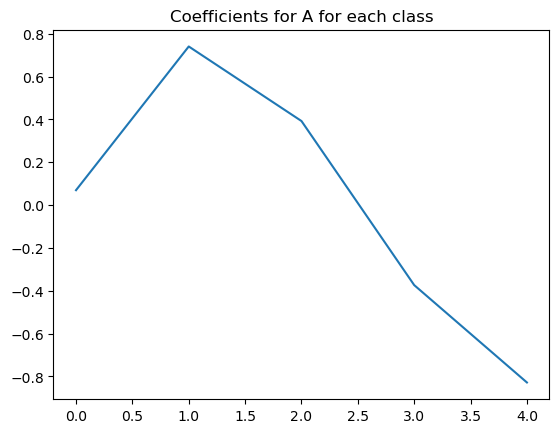

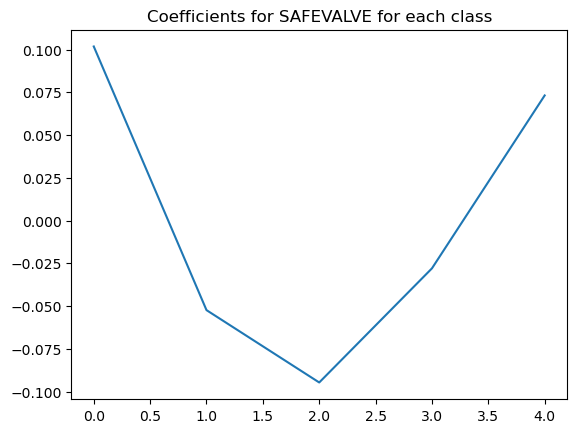

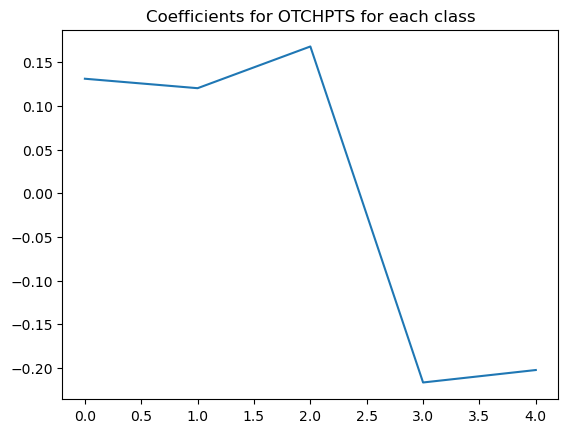

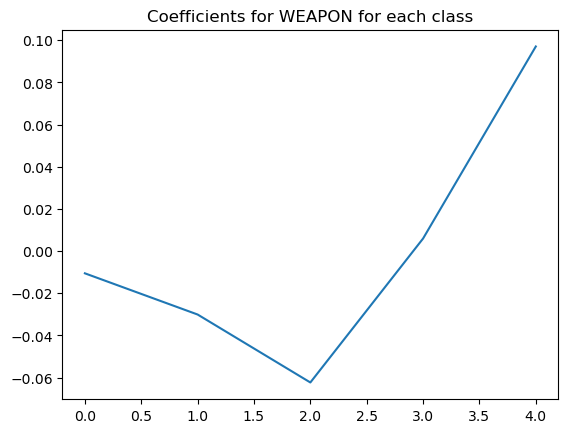

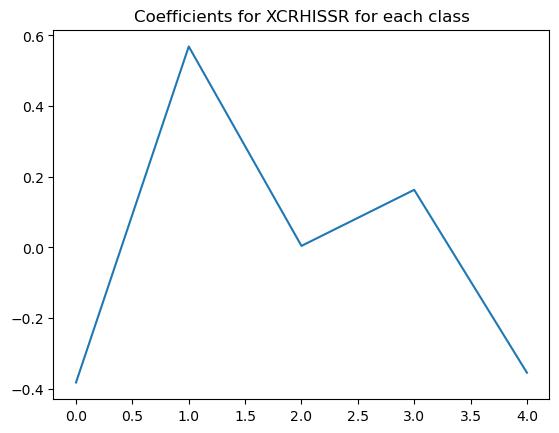

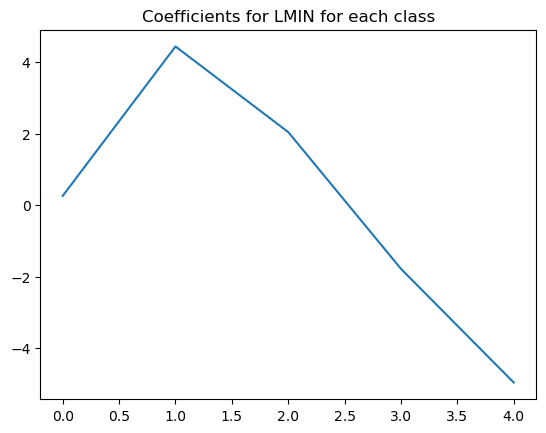

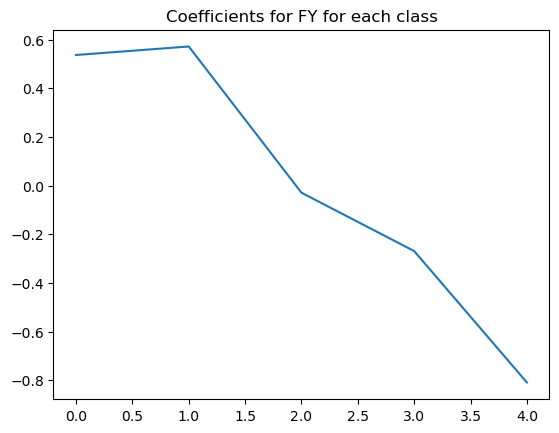

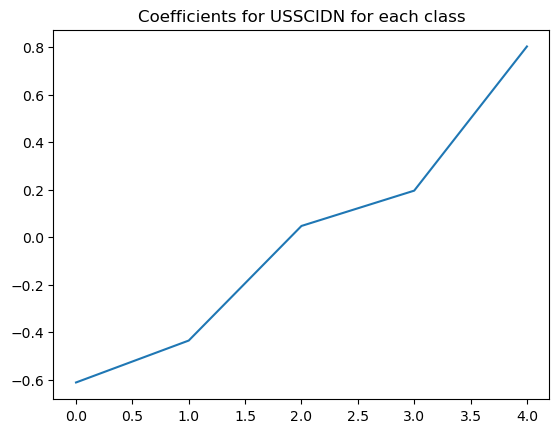

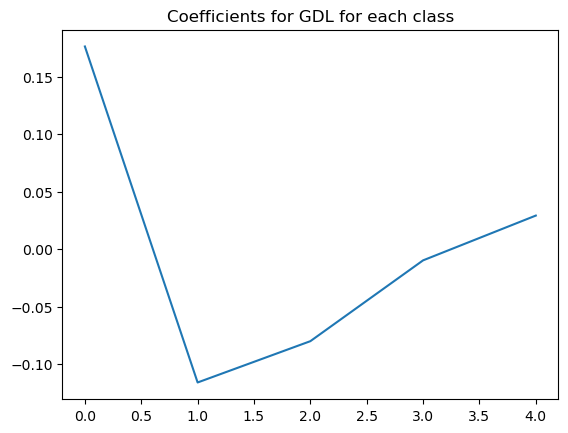

In [8]:
eda(bs_logreg, 'SENTIMP')

### GridSearchCV

In [9]:
with open('../models/sentimp/sentimp2_gs_lg', 'rb') as p_in_gs:
    gs_logreg = pickle.load(p_in_gs)

/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/kaitcrawford/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Model info
    Best Estimator: LogisticRegression(C=1000, random_state=42)
    N Splits: 5
    N Features In: 26
    Best Score: 0.8721214285714286
    


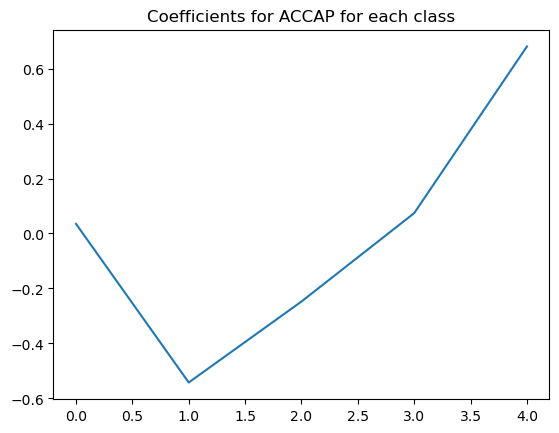

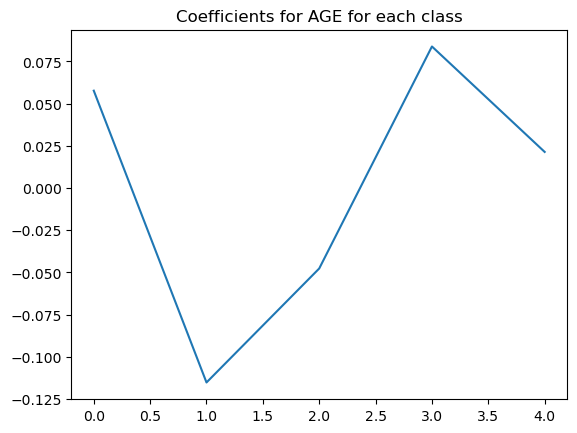

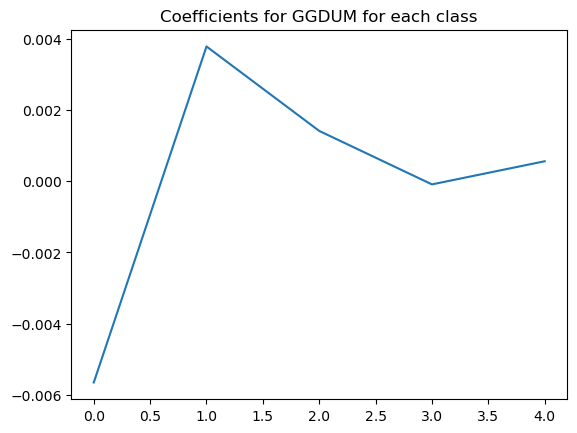

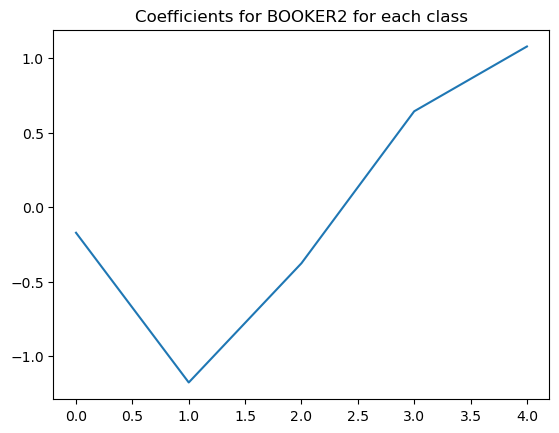

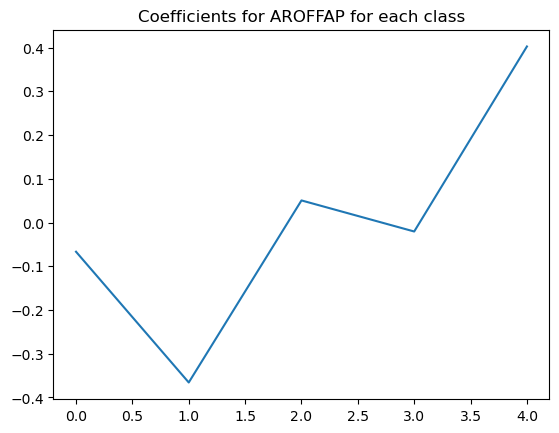

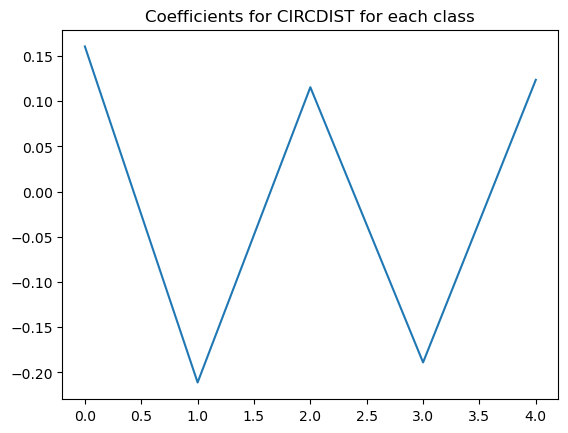

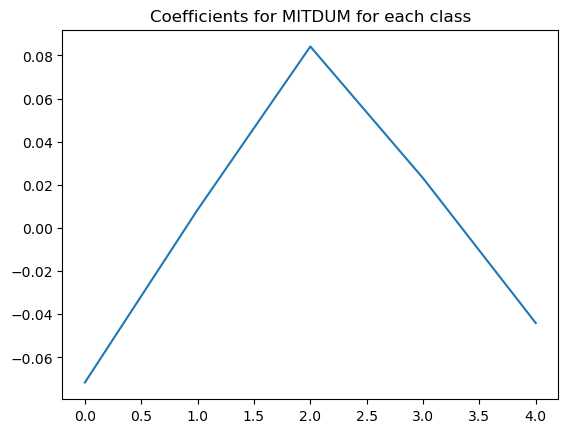

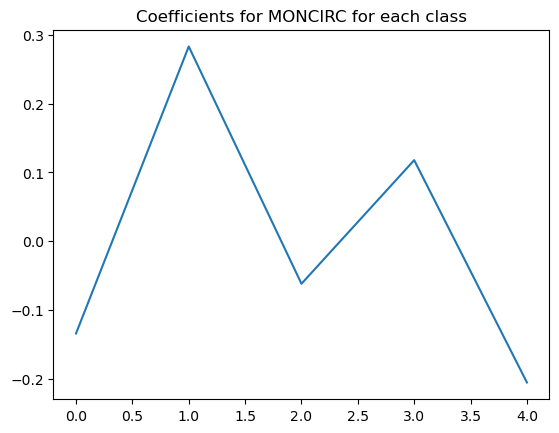

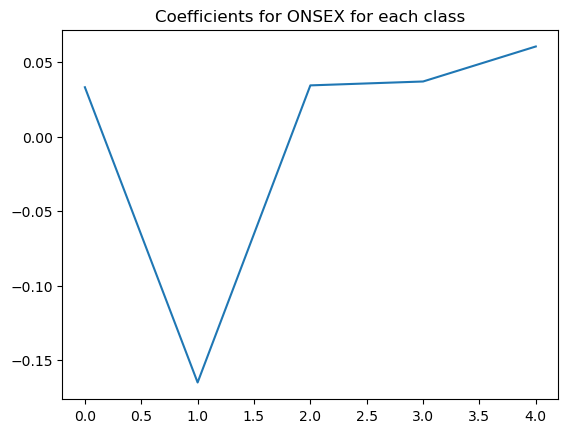

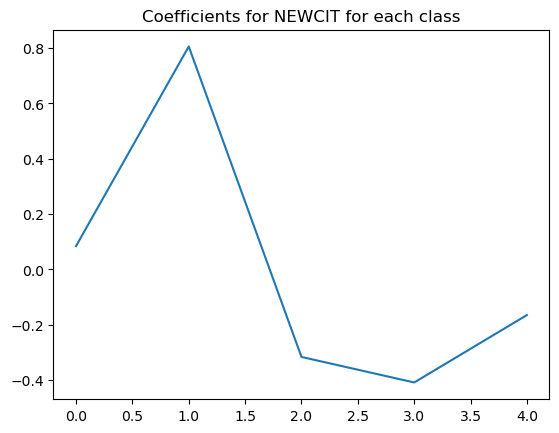

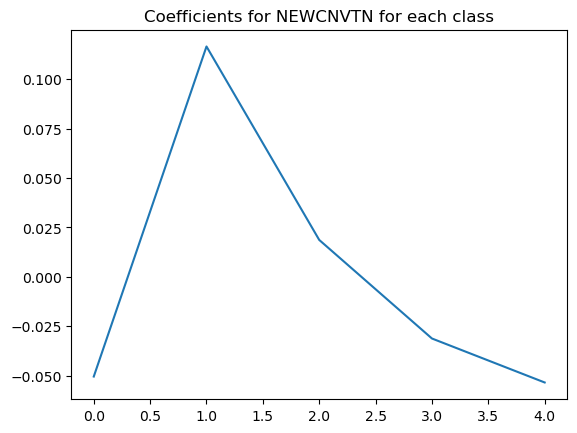

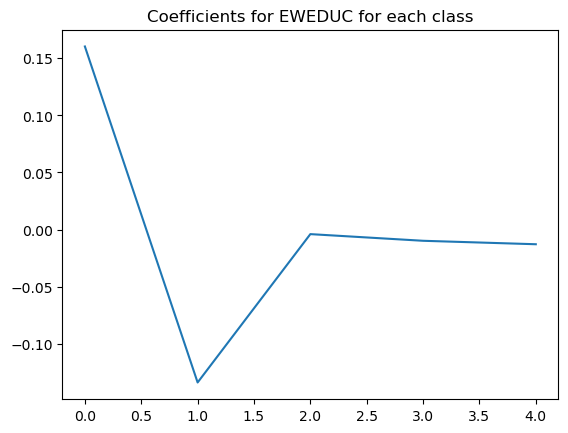

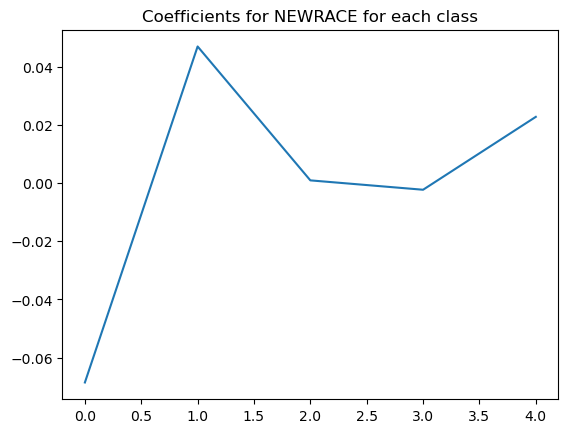

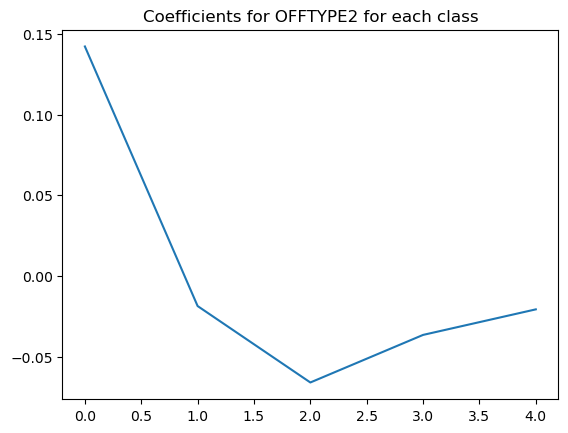

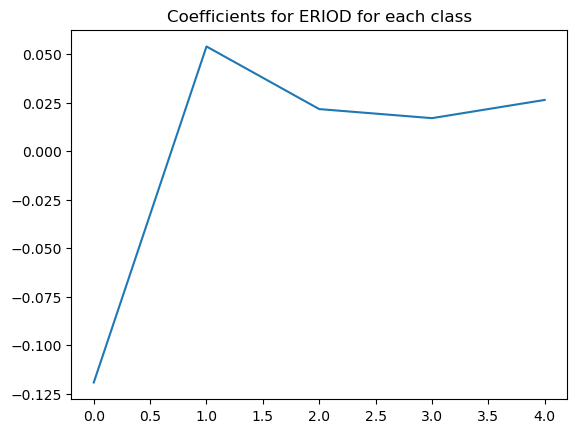

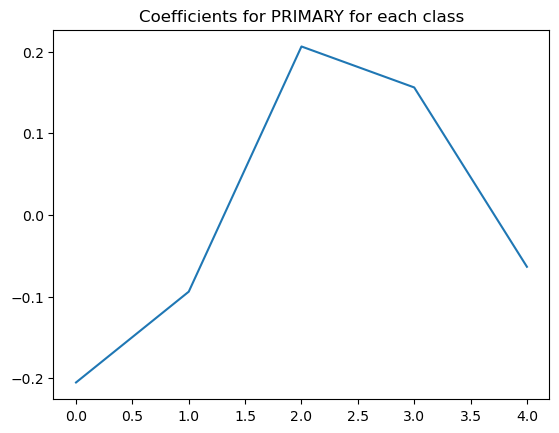

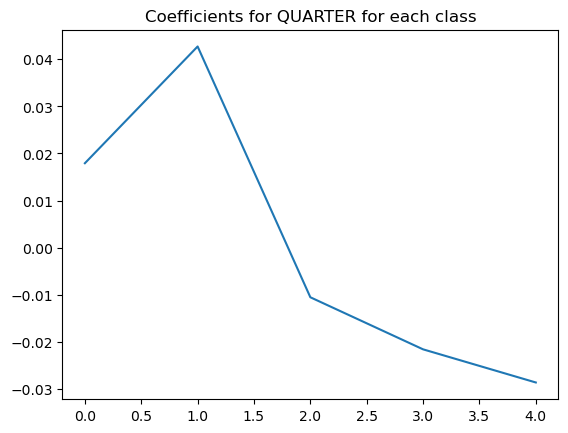

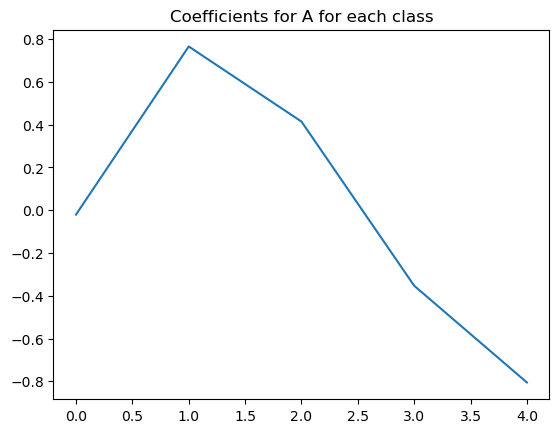

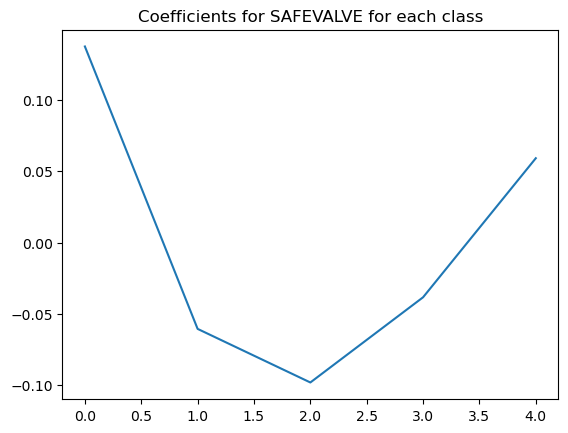

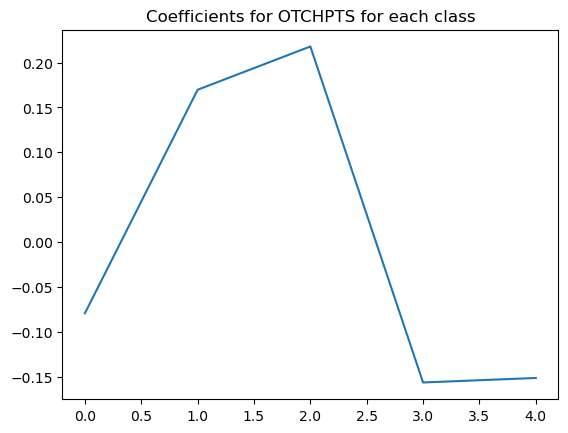

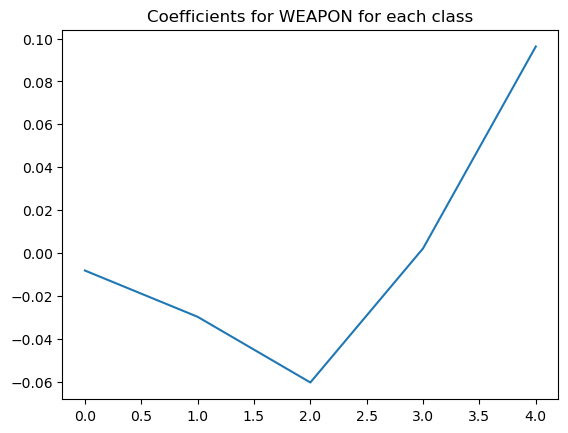

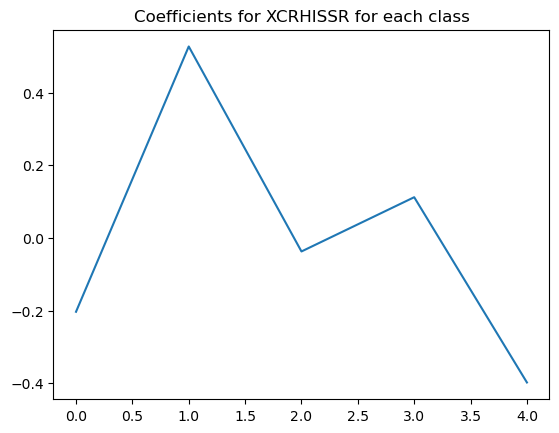

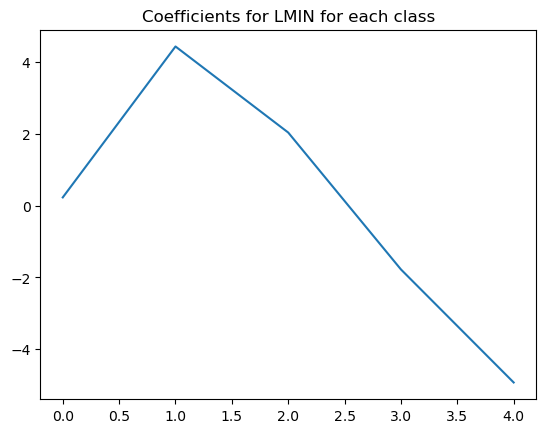

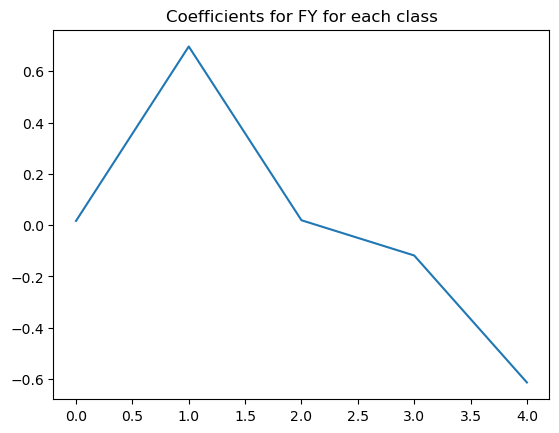

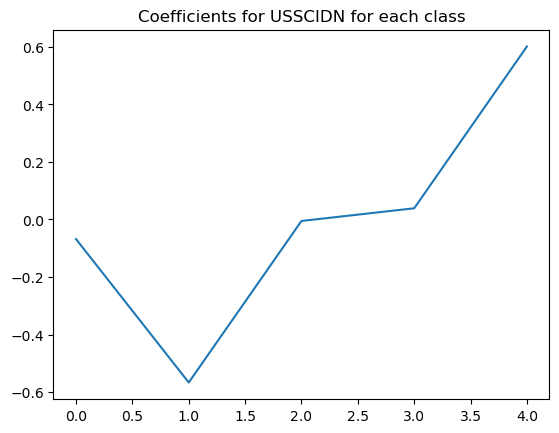

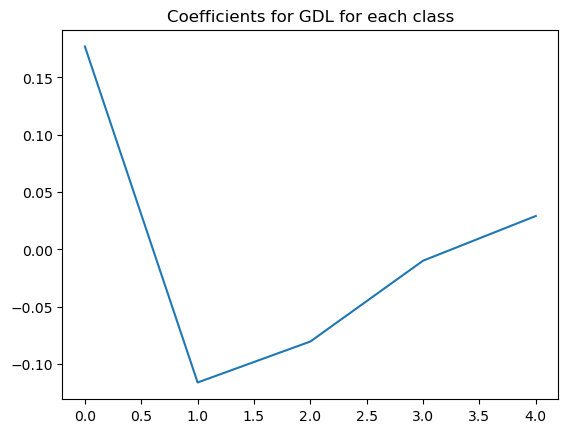

In [10]:
eda(gs_logreg, 'SENTIMP')

## Confusion Matrices

In [11]:
X = data.drop(columns = ['SENTIMP', 'ENSPLT0'])
y = data['SENTIMP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [12]:
target_classes

,0
0,No Prison/Probation (Fine Only)
1,Prison Only (No Alternatives)
2,"Prison + Confinement Conditions (Alternatives,..."
3,Probation + ConfinementConditions (Alternatives)
4,Probation Only


Top 10 Coefficients for Target 0
for every one unit increase, the chance for it being target 0 increases by the coefficient.
CIRCDIST     2.206880
FY           1.709822
LMIN         1.298079
GDL          1.192854
EWEDUC       1.173005
OFFTYPE2     1.154760
OTCHPTS      1.140037
SAFEVALVE    1.107148
NEWCIT       1.076829
A            1.071885
Name: 0, dtype: float64


Top 10 Coefficients for Target 1
for every one unit increase, the chance for it being target 1 increases by the coefficient.
LMIN        84.804073
NEWCIT       2.243978
A            2.096777
FY           1.770755
XCRHISSR     1.765682
MONCIRC      1.547219
OTCHPTS      1.127757
NEWCNVTN     1.122348
NEWRACE      1.048811
ERIOD        1.045112
Name: 1, dtype: float64


Top 10 Coefficients for Target 2
for every one unit increase, the chance for it being target 2 increases by the coefficient.
LMIN       7.728668
A          1.480392
PRIMARY    1.227193
OTCHPTS    1.182936
AROFFAP    1.162324
MONCIRC    1.107791
MITDUM     1.

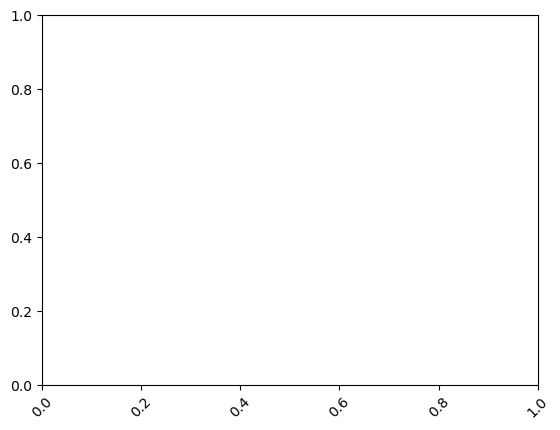

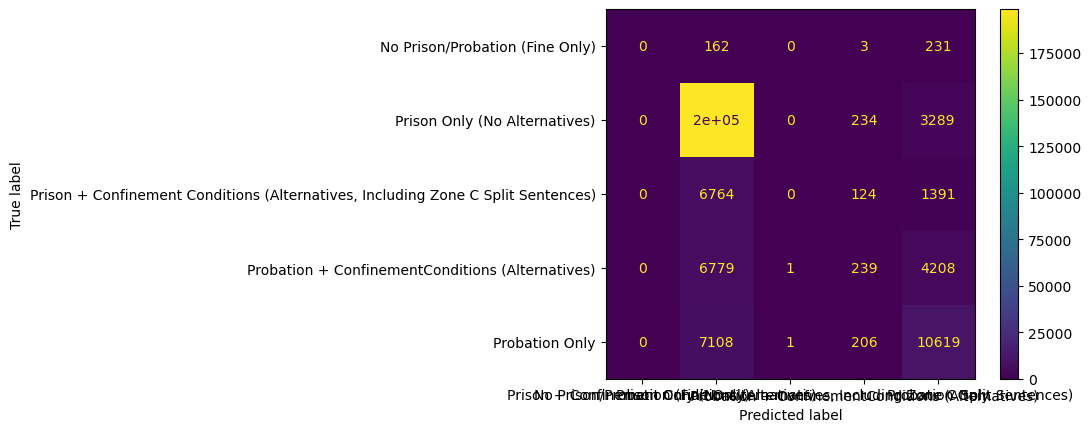

In [13]:
# Bayes Search
eda_confusion(bs_logreg, target='SENTIMP', drop_val='ENSPLT0')

Top 10 Coefficients for Target 0
for every one unit increase, the chance for it being target 0 increases by the coefficient.
LMIN         1.258831
GDL          1.193652
CIRCDIST     1.174251
EWEDUC       1.173824
OFFTYPE2     1.152814
SAFEVALVE    1.147427
NEWCIT       1.087852
AGE          1.059353
ACCAP        1.035589
ONSEX        1.033693
Name: 0, dtype: float64


Top 10 Coefficients for Target 1
for every one unit increase, the chance for it being target 1 increases by the coefficient.
LMIN        84.550291
NEWCIT       2.238733
A            2.149179
FY           2.007416
XCRHISSR     1.693311
MONCIRC      1.327127
OTCHPTS      1.184990
NEWCNVTN     1.123550
ERIOD        1.055473
NEWRACE      1.048145
Name: 1, dtype: float64


Top 10 Coefficients for Target 2
for every one unit increase, the chance for it being target 2 increases by the coefficient.
LMIN        7.678397
A           1.512968
OTCHPTS     1.243569
PRIMARY     1.229228
CIRCDIST    1.122499
MITDUM      1.087766
AROFFAP

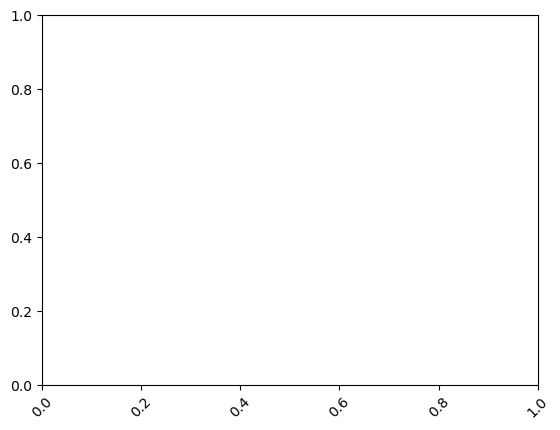

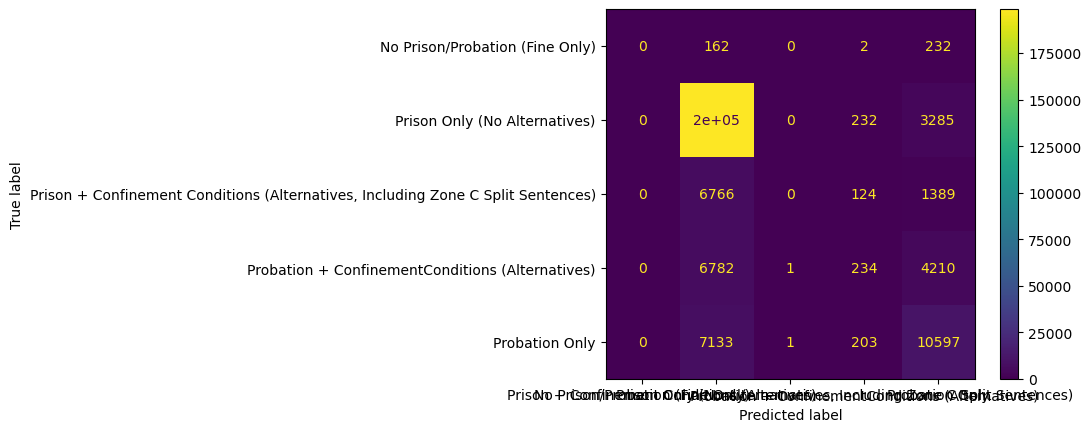

In [14]:
# Grid Search
eda_confusion(gs_logreg, target='SENTIMP', drop_val='ENSPLT0')